In [1]:
import socket
import struct
import time
import multiprocessing
import matplotlib.pyplot as plt
import numpy as np

-1.742987e-07
Completed Execution in 1.362107898999966 seconds


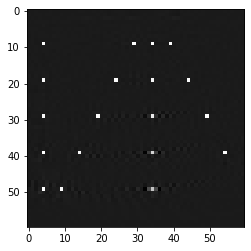

In [2]:
%run client.ipynb

In [3]:
def sending(sock):
        elapsed = time.perf_counter()
        send(sock, g.tobytes())
        elapsed = time.perf_counter() - elapsed
        print(f"Completed Execution in {elapsed} seconds")
        return elapsed

In [4]:
def multiconnect(g, num):
    #g = g.tobytes()
    elapsed = time.perf_counter()
    sockets = [socket.socket(socket.AF_INET, socket.SOCK_STREAM) for _ in range(num)]
    for sock in sockets:
        connect_host(sock)
    print(f"Connected in {time.perf_counter() - elapsed} seconds")
    pool = multiprocessing.Pool()
    return pool.map(sending, sockets)[0] #max()


In [5]:
def connect_thread(start):
    elapsed = start
    connect(g)
    return time.perf_counter() - elapsed

In [6]:
def test_threads(num):
    threads = []
    pool = multiprocessing.pool.ThreadPool(processes=num) #multiprocessing.Pool()
    start = time.perf_counter()
    elapsed = max(pool.map(connect_thread, [start] * num)) #[0]
    print(f"Max: {elapsed} seconds")
    return elapsed
    #ps = [];
    #for i in range(0, threads):
    #    p = Process(target=connect)
    #    p.start()
    #   ps.append(p)

    #for p in ps:
    #    p.join()

test_threads(3)

Completed Execution in 1.7621313220006414 seconds
Completed Execution in 1.766053142999226 seconds
Completed Execution in 1.8961808000003657 seconds
Max: 1.9003452090000792 seconds


1.9003452090000792

In [7]:
r = []

for i in range(12):
    r.append(test_threads(i+1)) #multiconnect(g, i+1)) #/(i+1)

Completed Execution in 1.2461755639997136 seconds
Max: 1.2497506710005837 seconds
Completed Execution in 1.3248791239984712 secondsCompleted Execution in 1.3253145849994326 seconds

Max: 1.329180696999174 seconds
Completed Execution in 1.8228706100017007 secondsCompleted Execution in 1.8226515730002575 seconds

Completed Execution in 1.877489948999937 seconds
Max: 1.8809130620011274 seconds
Completed Execution in 1.9604692949997116 seconds
Completed Execution in 2.1948850070002663 seconds
Completed Execution in 2.2676259560012113 seconds
Completed Execution in 2.283672742001727 seconds
Max: 2.2870554460005224 seconds
Completed Execution in 3.7247156829998858 seconds
Completed Execution in 3.8497082319991023 seconds
Completed Execution in 3.8606038889993215 seconds
Completed Execution in 4.039058313999703 seconds
Completed Execution in 4.092475620000187 seconds
Max: 4.095923490998757 seconds
Completed Execution in 3.766498891000083 seconds
Completed Execution in 3.8250589719991694 secon

In [8]:
seq = []
worth = []
rvalue = r[0]
for i in range(1, len(r) + 1):
    seq.append(rvalue*i)
    intercept = r[i-1]/rvalue
    worth.append((rvalue*i - r[i-1])*(i - intercept)/2 - (r[i-1])*(intercept-1)/2)
bestindex = max(range(len(worth)), key=worth.__getitem__)
best = r[bestindex]

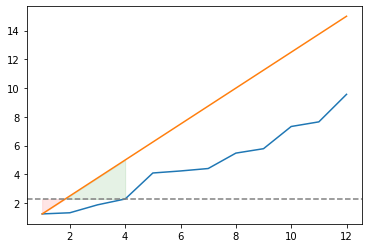

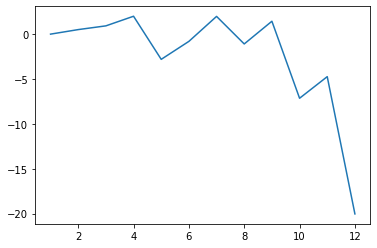

In [9]:
plt.plot(range(1, len(r)+1), r)
plt.plot(range(1, len(seq)+1), seq)
plt.axhline(best, color="gray", linestyle="--")
plt.fill_between(range(1, len(seq)+1), seq, best, where=[v < best for v in seq], alpha=0.1, color="red", interpolate=True)
plt.fill_between(range(1, len(seq)+1), seq, best, where=[seq[i] > best and i <= bestindex for i in range(len(seq))], alpha=0.1, color="green", interpolate=True)
plt.show()
plt.plot(range(1, len(worth)+1), worth)